<a href="https://colab.research.google.com/github/satani99/practical_deep_learning_for_coders/blob/main/fast_ai_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [ ]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(path,
                                      get_image_files(path),
                                      valid_pct=0.2,
                                      seed=42,
                                      label_func=is_cat,
                                      item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.154453,0.022719,0.007442,00:52


epoch,train_loss,valid_loss,error_rate,time
0,0.073132,0.010624,0.004060,00:57


In [ ]:
img = PILImage.create('/content/cat.jpeg')
is_cat, _, probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [2]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(path,
                                              bs=8,
                                              fnames=get_image_files(path/"images",
                                                                     ),
                                              label_func=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
                                              codes = np.loadtxt(path/'codes.txt', dtype=str))

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,2.886294,2.552832,00:04


epoch,train_loss,valid_loss,time
0,2.030628,1.613051,00:01
1,1.745075,1.275860,00:01
2,1.575911,1.113968,00:01
3,1.392082,0.953505,00:01
4,1.268336,0.972090,00:01
5,1.150390,0.864882,00:01
6,1.051147,0.794923,00:01
7,0.974638,0.783825,00:01


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


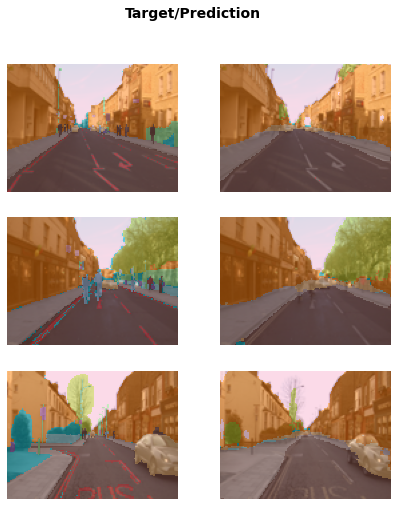

In [7]:
learn.show_results(max_n=3
                   ,figsize=(7,8))

In [8]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.457750,0.401864,0.816960,03:21


epoch,train_loss,valid_loss,accuracy,time
0,0.292581,0.245472,0.899320,07:07
1,0.242995,0.230340,0.910200,07:07


KeyboardInterrupt: ignored

In [11]:
learn.predict(" I loved this movie")

('pos', TensorText(1), TensorText([9.6483e-05, 9.9990e-01]))

In [12]:
doc(learn.predict)

Learner.predict(item, rm_type_tfms=None, with_input=False)
Prediction on `item`, fully decoded, loss function decoded and probabilities

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [13]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
                                  cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                                               'relationship', 'race'],
                                  cont_names = ['age', 'fnlwgt', 'education-num'],
                                  procs = [Categorify, FillMissing, Normalize])
learn = tabular_learner(dls, metrics=accuracy)

In [14]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.382547,0.366462,0.820639,00:05
1,0.350714,0.348219,0.839220,00:03
2,0.357518,0.346132,0.842598,00:03


In [5]:
from fastai.vision.all import *
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5, 0.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,11.795533,12.120854,00:00


epoch,train_loss,valid_loss,time
0,11.801056,12.120854,00:00
1,11.796968,12.120854,00:00
2,11.837685,12.120854,00:00
3,11.763552,12.120854,00:00
4,11.775171,12.120854,00:00
5,11.759486,12.120854,00:00
6,11.795537,12.120854,00:00
7,11.777761,12.120854,00:00
8,11.833722,12.120854,00:00
9,11.801130,12.120854,00:00
